In [1]:
# This is a sample Python script.
import matplotlib.pyplot as plt
import pickle
# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
from Sender import *
# from Receiver import *
import sounddevice as sd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
import cv2

# Press the green button in the gutter to run the script.


sender = Sender(1000, 5000)
sender.load_text('data/text.txt')
sender.load_image('data/1_20_Imagen1.png')
audio  = sender.send_all_data()
#audio_texto = sender.send_text()
#audio_img = sender.send_image()

#if len(audio_texto) > len(audio_img):
    #audio_img = np.pad(audio_img, (0, len(audio_texto) - len(audio_img)), 'constant')
#else:
   # audio_texto = np.pad(audio_texto, (0, len(audio_img) - len(audio_texto)), 'constant')
    
#audio = audio_img
# #wavfile.write('audio3.wav', 44100,audio)
#sender.playText(audio)

# receiver = Receiver(600, 800)
# audio = receiver.listen(60)
# wavfile.write("audio2.wav", 44100, audio)
# print("Done listening")

# fs, audio = wavfile.read("audio1.wav")

# audio = audio[44100:]

# # Normalize signal

# audio = audio/np.max(np.abs(audio))
# audio = audio - np.mean(audio)

# # Plot signal

# plt.plot(audio)
# plt.show()

# # Demodulate signal




In [2]:
from Receiver import Receiver   

In [3]:
receiver = Receiver(1000, 5000,20)

In [4]:
receiver.freqDict

{'00': 1000.0, '01': 2333.333333333333, '10': 3666.6666666666665, '11': 5000.0}

In [5]:
sender.FreqDict

{'00': 1000.0, '01': 2333.333333333333, '10': 3666.6666666666665, '11': 5000.0}

In [6]:
bits = receiver.decode_audio(audio)

44541
441
44982
441
45423
441
45864
441
46305
441
46746
441
47187
441
47628
441
48069
441
48510
441
48951
441
49392
441
49833
441
50274
441
50715
441
51156
441
51597
441
52038
441
52479
441
52920
441
53361
441
53802
441
54243
441
54684
441
55125
441
55566
441
56007
441
56448
441
56889
441
57330
441
57771
441
58212
441
58653
441
59094
441
59535
441
59976
441
60417
441
60858
441
61299
441
61740
441
62181
441
62622
441
63063
441
63504
441
63945
441
64386
441
64827
441
65268
441
65709
441
66150
441
66591
441
67032
441
67473
441
67914
441
68355
441
68796
441
69237
441
69678
441
70119
441
70560
441
71001
441
71442
441
71883
441
72324
441
72765
441
73206
441
73647
441
74088
441
74529
441
74970
441
75411
441
75852
441
76293
441
76734
441
77175
441
77616
441
78057
441
78498
441
78939
441
79380
441
79821
441
80262
441
80703
441
81144
441
81585
441
82026
441
82467
441
82908
441
83349
441
83790
441
84231
441
84672
441
85113
441
85554
441
85995
441
86436
441
86877
441
87318
441
87759
441
88200
441


In [7]:
img = bits[0]

In [8]:
text = bits[1]

In [9]:
text

'¡Laboratorio de Tecnologías de Información y de Comunicación EL5207! Transmisor número 1, primavera 2023.'

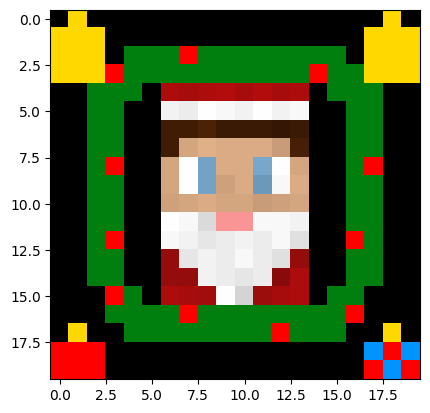

In [10]:
plt.imshow(img)

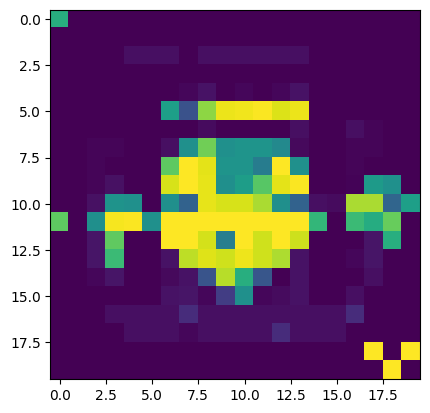

In [18]:
plt.imshow(bits[:,:,2])

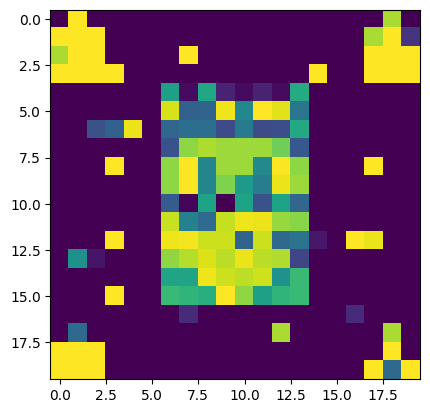

In [19]:
plt.imshow(bits[:,:,0])

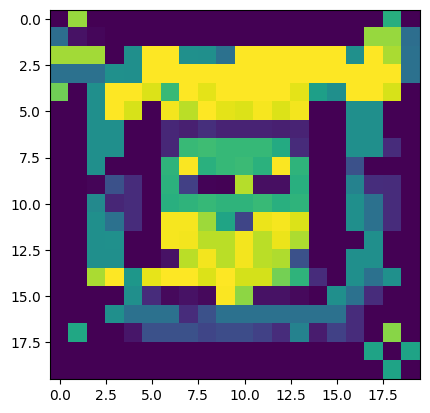

In [20]:
plt.imshow(bits[:,:,1])

In [21]:
bits = bits.astype(int)

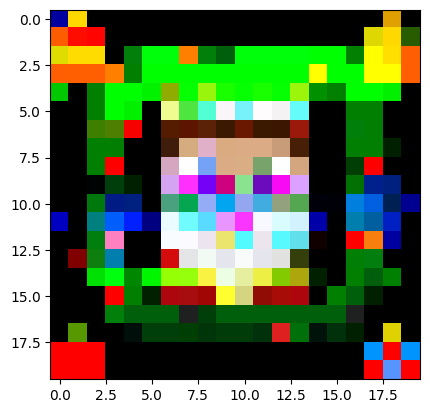

In [22]:
plt.imshow(bits, cmap='gray')

In [23]:
img = cv2.imread('data/1_20_Imagen1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [24]:
red = img[:,:,2]
green = img[:,:,1]
blue = img[:,:,0]

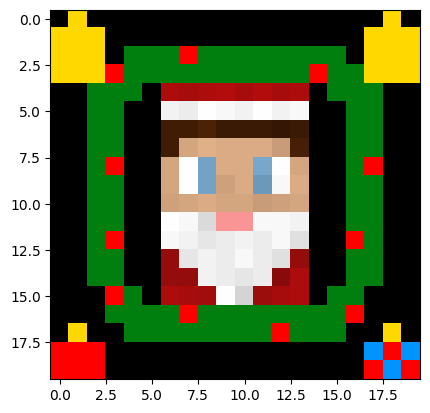

In [25]:
plt.imshow(img)

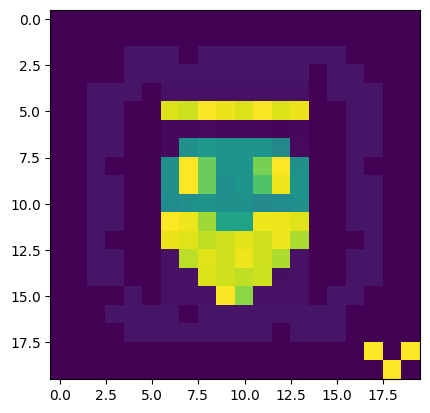

In [26]:
plt.imshow(red)


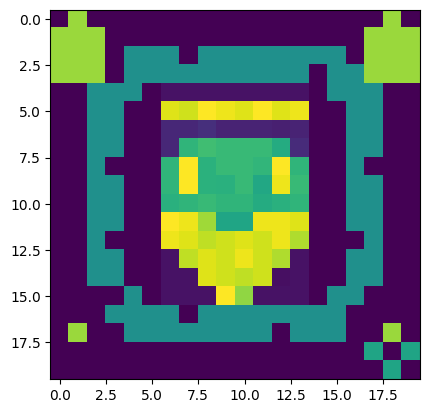

In [27]:
plt.imshow(green)

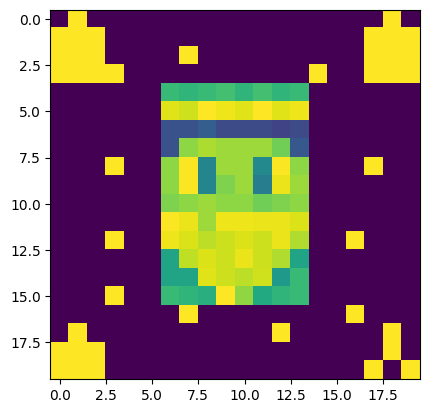

In [28]:
plt.imshow(blue)

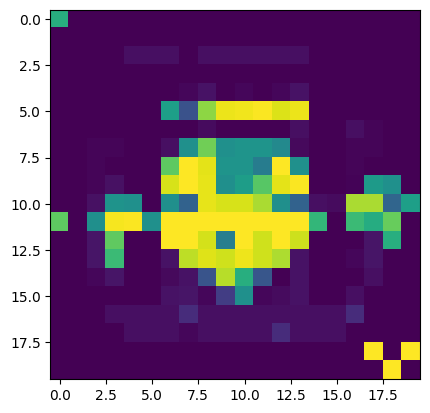

In [29]:
plt.imshow(bits[:,:,2])